In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt

In [2]:
sal=pd.read_csv('data/salaries_data.csv')

In [3]:
sal=sal.drop(['salary'], axis=1)

In [4]:
#work_year: The year the salary was paid.
#experience_level: The experience level in the job during the year 
#employment_type: The type of employment for the role
#job_title: The role worked in during the year.
#salary: The total gross salary amount paid.
#salary_currency: The currency of the salary paid as an ISO 4217 currency code.
#salaryinusd: The salary in USD
#employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
#remote_ratio: The overall amount of work done remotely
#company_location: The country of the employer's main office or contracting branch
#company_size: The median number of people that worked for the company during the year

sal.job_title.unique()

array(['Data Engineer', 'BI Data Analyst', 'ML Engineer',
       'Machine Learning Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Principal Data Scientist',
       'Data Engineering Manager', 'Data Analytics Manager',
       'Big Data Engineer', 'Research Scientist',
       'Machine Learning Developer', 'Computer Vision Engineer',
       'AI Scientist', 'Machine Learning Manager', 'Lead Data Scientist',
       'Director of Data Science', '3D Computer Vision Researcher',
       'Data Specialist', 'Applied Data Scientist',
       'Data Science Engineer', 'Head of Data', 'Analytics Engineer',
       'ETL Developer', 'Marketing Data Analyst', 'Data Architect',
       'Data Science Consultant', 'Principal Data Analyst',
       'Head of Data Science', 'Lead Data Engineer',
       'Data Science Manager', 'Applied Machine Learning Scientist',
       'Lead Data Analyst', 'Cloud Data Engineer',
       'Lead Machine Learning Engineer',
       'Machine Learning 

In [5]:
sal.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,EUR,26005,RO,0,US,L


In [6]:
def currito(x):
    if 'Vision' in x:
        return 'Compute Vision'
    elif 'Head' in x or 'Lead' in x:
        return x
    elif 'ML' in x or 'Machine' in x:
        return 'Machine Learning'
    elif 'Analytics' in x or 'Analyst' in x:
        return 'Data Analyst'
    elif 'Scientist' in x or 'Science' in x:
        return 'Data Scientist'
    elif 'ETL' in x or 'Big' in x or 'Engineering' in x or 'Engineer' in x:
        return 'Data Engineer'
    else:
        return x

In [7]:
sal.job_title.apply(currito)

0         Data Engineer
1         Data Engineer
2          Data Analyst
3      Machine Learning
4         Data Engineer
             ...       
495       Data Engineer
496       Data Engineer
497      Data Architect
498       Data Engineer
499      Compute Vision
Name: job_title, Length: 500, dtype: object

In [8]:
#sal.job_title.unique()

In [9]:
#sal.employment_type=LabelEncoder().fit_transform(sal.employment_type)
#sal.experience_level=LabelEncoder().fit_transform(sal.experience_level)
#sal.company_size=LabelEncoder().fit_transform(sal.company_size)
#sal.employee_residence=LabelEncoder().fit_transform(sal.employee_residence)
#sal.company_location=LabelEncoder().fit_transform(sal.company_location)
#sal.job_title=LabelEncoder().fit_transform(sal.job_title)

In [10]:
sal=pd.get_dummies(sal, columns=['job_title','company_size', 'experience_level', 'employment_type', 'company_location'])

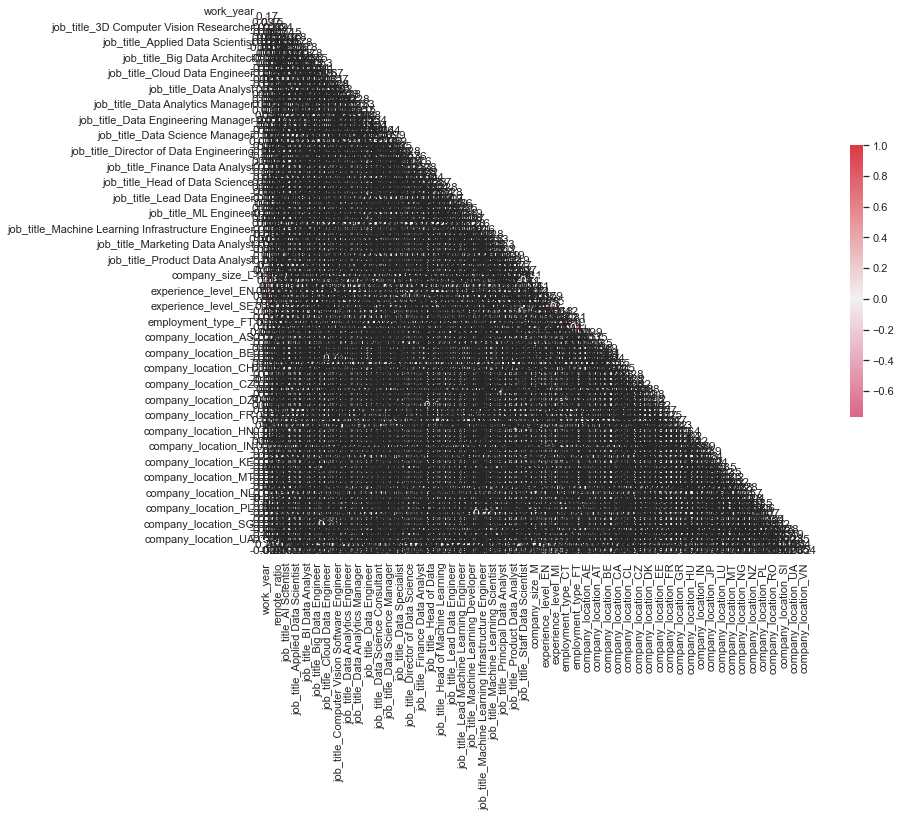

In [11]:
# Your response here. 
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(sal.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(sal.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [12]:
xtrain=sal.drop('salary_in_usd', axis=1)
ytrain=sal.salary_in_usd

In [13]:
import h2o

from h2o.automl import H2OAutoML

In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu17.34+19-CA (build 17.0.3+7-LTS, mixed mode, sharing)
  Starting server from C:\Users\david\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\david\AppData\Local\Temp\tmpv3aps3d3
  JVM stdout: C:\Users\david\AppData\Local\Temp\tmpv3aps3d3\h2o_david_started_from_python.out
  JVM stderr: C:\Users\david\AppData\Local\Temp\tmpv3aps3d3\h2o_david_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_david_oyywll
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [15]:
test=pd.read_csv('data/testeo.csv')
test=test.drop(['salary'], axis=1)
aux2=test.job_title.apply(currito)
#test.employment_type=LabelEncoder().fit_transform(test.employment_type)
#test.experience_level=LabelEncoder().fit_transform(test.experience_level)
#test.company_size=LabelEncoder().fit_transform(test.company_size)
#test.employee_residence=LabelEncoder().fit_transform(test.employee_residence)
#test.company_location=LabelEncoder().fit_transform(test.company_location)
#test.job_title=LabelEncoder().fit_transform(test.job_title)
test=pd.get_dummies(test, columns=['job_title','company_size', 'experience_level', 'employment_type', 'company_location'])

In [16]:
h2train=h2o.H2OFrame(sal)
h2test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
h2train.columns

['work_year',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'job_title_3D Computer Vision Researcher',
 'job_title_AI Scientist',
 'job_title_Analytics Engineer',
 'job_title_Applied Data Scientist',
 'job_title_Applied Machine Learning Scientist',
 'job_title_BI Data Analyst',
 'job_title_Big Data Architect',
 'job_title_Big Data Engineer',
 'job_title_Business Data Analyst',
 'job_title_Cloud Data Engineer',
 'job_title_Computer Vision Engineer',
 'job_title_Computer Vision Software Engineer',
 'job_title_Data Analyst',
 'job_title_Data Analytics Engineer',
 'job_title_Data Analytics Lead',
 'job_title_Data Analytics Manager',
 'job_title_Data Architect',
 'job_title_Data Engineer',
 'job_title_Data Engineering Manager',
 'job_title_Data Science Consultant',
 'job_title_Data Science Engineer',
 'job_title_Data Science Manager',
 'job_title_Data Scientist',
 'job_title_Data Specialist',
 'job_title_Director of Data Engineering',
 'job_title_Director of

In [18]:
X=[c for c in h2train.columns if c!='salary_in_usd']

y='salary_in_usd'

In [19]:
automl=H2OAutoML(max_models=20,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [20]:
automl.train(x=X,
             y=y,
             training_frame=h2train)

AutoML progress: |
15:03:08.641: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20221205_150308


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    33                 33                          12818                  6            8            7.60606       13            26            22.9091

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1641633451.0637724
RMSE: 40517.07604287077
MAE: 25841.94926953125
RMSLE: 0.36087220001721476
Mean Residual Deviance: 1641633451.0637724

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2402352776.852521
RMSE: 49013.801901632985
MAE: 32942.99718420274
RMSLE: 0.4952017437455356
Mean Residual Deviance: 2402352776.852521

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     33133.2      2888.48      35428.2       29169.3       31795.4       32892.5       36380.7
mean_residual_deviance  2.43062e+09  8.18673e+08  3.24636e+09   1.46942e+09   1.70763e+09   2.55522e+09   3.17448e+09
mse                     2.43062e+09  8.18673e+08  3.24636e+09   1.46942e+09   1.70763e+09   2.55522e+09   3.17448e+09
r2                      0.498803     0.097479     0.433663      0.650718      0.471115      0.533191      0.405326
residual_deviance       2.43062e+09  8.18673e+08  3.24636e+09   1.46942e+09   1.70763e+09   2.55522e+09   3.17448e+09
rmse                    48705        8547.24      56976.8       38333         41323.5       50549.2       56342.5
rmsle                   0.491039     0.0595894    0.405952      0.552701      0.498922      0.460217      0.537402

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-12-05 15:03:13  1.006 sec   0                  69544.1          52000.6         4.83638e+09
    2022-12-05 15:03:13  1.062 sec   5                  55687            39312.6         3.10104e+09
    2022-12-05 15:03:13  1.105 sec   10                 48330.2          32582.7         2.33581e+09
    2022-12-05 15:03:13  1.149 sec   15                 44799.8          29598.5         2.00702e+09
    2022-12-05 15:03:13  1.205 sec   20                 42886.9          27932.4         1.83929e+09
    2022-12-05 15:03:14  1.251 sec   25                 41722.3          26703.6         1.74075e+09
    2022-12-05 15:03:14  1.318 sec   30                 40835.7          26130.8         1.66756e+09
    2022-12-05 15:03:14  1.350 sec   33                 40517.1          25841.9         1.64163e+09

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  --------------------
employee_residence       3458619146240.0        1.0                  0.42398518466815655
salary_currency          1125581848576.0        0.32544255408973377  0.1379828213946123
company_location_US      760622219264.0         0.2199207796819439   0.09324315238581396
experience_level_EX      475844345856.0         0.13758217535264297  0.05833280402393703
job_title_Data Analyst   436435681280.0         0.12618784053007578  0.05350177487002007
experience_level_SE      289804058624.0         0.08379183898841748  0.03552649832718863
experience_level_EN      233353166848.0         0.06747003846945315  0.02860629672003872
job_title_Data Engineer  210759974912.0  

In [28]:
leader_board=automl.leaderboard

leader_board.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_1_20221205_150308,49013.8,2.40235e+09,32943,0.495202,2.40235e+09
GBM_grid_1_AutoML_1_20221205_150308_model_4,49085.5,2.40939e+09,33089.8,0.504537,2.40939e+09
GBM_4_AutoML_1_20221205_150308,49127.2,2.41348e+09,33238.2,0.507316,2.41348e+09
GBM_2_AutoML_1_20221205_150308,49275.9,2.42811e+09,33400.8,0.501223,2.42811e+09
GBM_grid_1_AutoML_1_20221205_150308_model_2,49911.4,2.49114e+09,33676.7,0.51989,2.49114e+09
GBM_grid_1_AutoML_1_20221205_150308_model_1,50116.3,2.51164e+09,32381.5,0.494427,2.51164e+09
GBM_5_AutoML_1_20221205_150308,50174.8,2.51751e+09,32643.5,0.505835,2.51751e+09
GBM_grid_1_AutoML_1_20221205_150308_model_5,50219.6,2.52201e+09,33710.9,0.513759,2.52201e+09
GBM_grid_1_AutoML_1_20221205_150308_model_3,51145.6,2.61587e+09,33675.4,0.536968,2.61587e+09
DRF_1_AutoML_1_20221205_150308,51233.5,2.62488e+09,33386.2,0.512073,2.62488e+09


In [31]:
dats=h2o.as_list(leader_board)

In [38]:
dats.rmsle.min()

0.4944274881377971

In [22]:
y_pred=automl.leader.predict(h2test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


C:\Users\david\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'salary_currency' has levels not trained on: ["CNY", "DKK"]
  warnings.warn(w)
C:\Users\david\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'employee_residence' has levels not trained on: ["AR", "CN", "CO", "DK", "HR", "IQ", "PH", "TN"]
  warnings.warn(w)
C:\Users\david\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'job_title_3D Computer Vision Researcher': substituting in a column of NaN
  warnings.warn(w)
C:\Users\david\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'job_title_Applied Data Scientist': substituting in a column of NaN
  warnings.warn(w)
C:\Users\david\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'job_title_Big Data Architect': substituting in a column of NaN
  warnings.warn(w

In [23]:
type(y_pred)

h2o.frame.H2OFrame

In [24]:
pred = h2o.as_list(y_pred)

In [25]:
pred.to_csv('data/resultado.csv')